In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
data=pd.read_csv(r"D:\jupyter name\数据\电商.csv")

## 数据预览

In [3]:
data.head()

,user_id,new_user,age,sex,market,device,operative_system,source,total_pages_visited,home_page,listing_page,product_page,payment_page,confirmation_page
0,jd_49db0d7c3d515,0,21,Female,1,mobile,android,Seo,5,home_page,listing_page,product_page,payment_page,NaN
1,jd_44a228c1a32a3,0,19,Male,3,mobile,android,Direct,9,home_page,listing_page,product_page,payment_page,payment_confirmation_page
2,jd_sMWMgBPEIRny,0,20,Female,1,mobile,other,Direct,5,home_page,listing_page,product_page,payment_page,NaN
3,jd_7e8dec2d1fd48,1,40,Male,2,desktop,mac,Direct,4,home_page,listing_page,product_page,payment_page,NaN
4,jd_5087a566feedc,0,29,Female,1,desktop,windows,Direct,15,home_page,listing_page,product_page,payment_page,payment_confirmation_page


In [4]:
data.shape

(100000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              100000 non-null  object
 1   new_user             100000 non-null  int64 
 2   age                  100000 non-null  int64 
 3   sex                  99227 non-null   object
 4   market               100000 non-null  int64 
 5   device               99867 non-null   object
 6   operative_system     99783 non-null   object
 7   source               99877 non-null   object
 8   total_pages_visited  100000 non-null  int64 
 9   home_page            100000 non-null  object
 10  listing_page         73894 non-null   object
 11  product_page         49618 non-null   object
 12  payment_page         6862 non-null    object
 13  confirmation_page    2404 non-null    object
dtypes: int64(4), object(10)
memory usage: 10.7+ MB


In [6]:
data.describe()

,new_user,age,market,total_pages_visited
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,0.315250,30.39508,1.722380,5.907490
std,0.464618,8.04239,0.965203,4.199546
min,0.000000,17.00000,1.000000,1.000000
25%,0.000000,24.00000,1.000000,3.000000
50%,0.000000,30.00000,1.000000,5.000000
75%,1.000000,36.00000,2.000000,7.000000
max,1.000000,123.00000,4.000000,28.000000


## 数据预处理

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data=data.drop('user_id',axis=1)

In [9]:
columns=['是否为新用户（1是）','年龄','性别','市场级别','设备','系统',
        '来源','浏览页面总数','浏览过主页','浏览过列表页','浏览过详情页','浏览过支付页','支付完成页']
data.columns=columns

In [10]:
data.isnull().sum()

是否为新用户（1是）        0
年龄                0
性别              773
市场级别              0
设备              133
系统              217
来源              123
浏览页面总数            0
浏览过主页             0
浏览过列表页        26106
浏览过详情页        50382
浏览过支付页        93138
支付完成页         97596
dtype: int64

In [11]:
data['年龄']=data['年龄'].fillna(data['年龄'].mean())
data['性别'] = data['性别'].fillna(data['性别'].mode()[0])
data['设备'] = data['设备'].fillna(data['设备'].mode()[0])
data['系统'] = data['系统'].fillna(data['系统'].mode()[0])
data['来源'] = data["来源"].fillna(data['来源'].mode()[0])

In [12]:
cols = data.loc[:, '浏览过主页':'支付完成页'].columns
for col in cols:
    data[col] = data[col].apply(lambda x: 0 if pd.isna(x) else 1).astype(int)

In [13]:
data=data[data['年龄']<=80]

In [14]:
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '>60']
data['年龄段'] = pd.cut(data['年龄'], bins=bins, labels=labels)

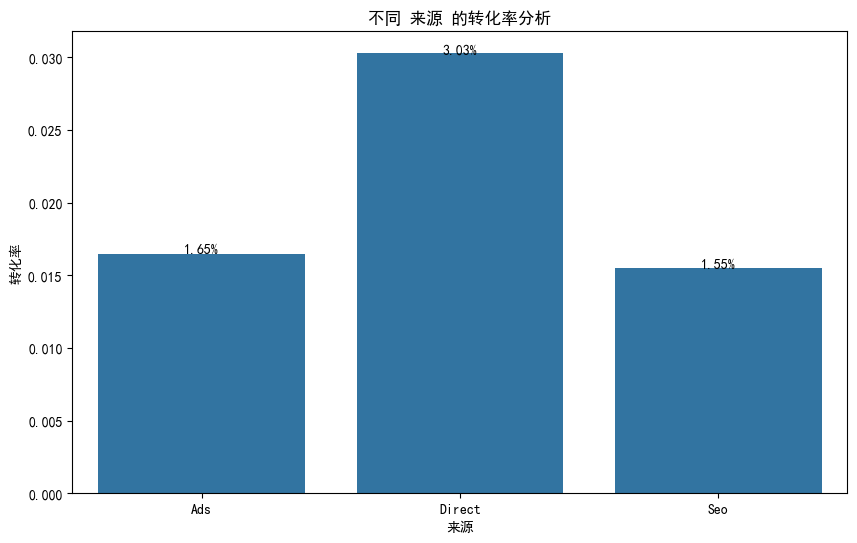

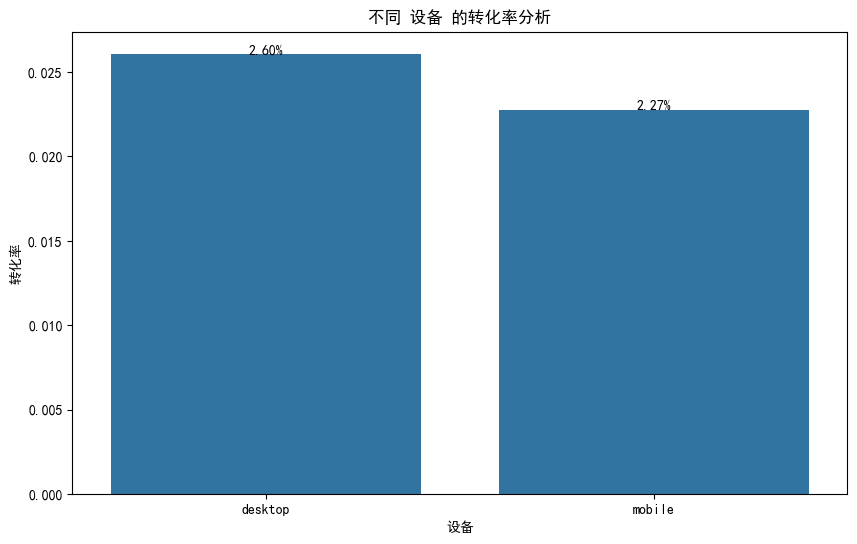

C:\Users\86150\AppData\Local\Temp\ipykernel_19340\1707822979.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rates = df.groupby(col)['支付完成页'].agg(['mean', 'count']).reset_index()


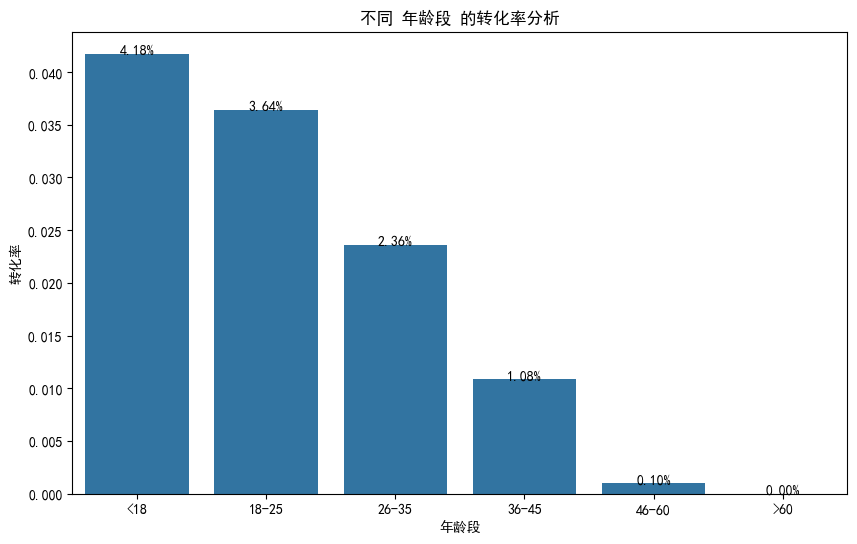

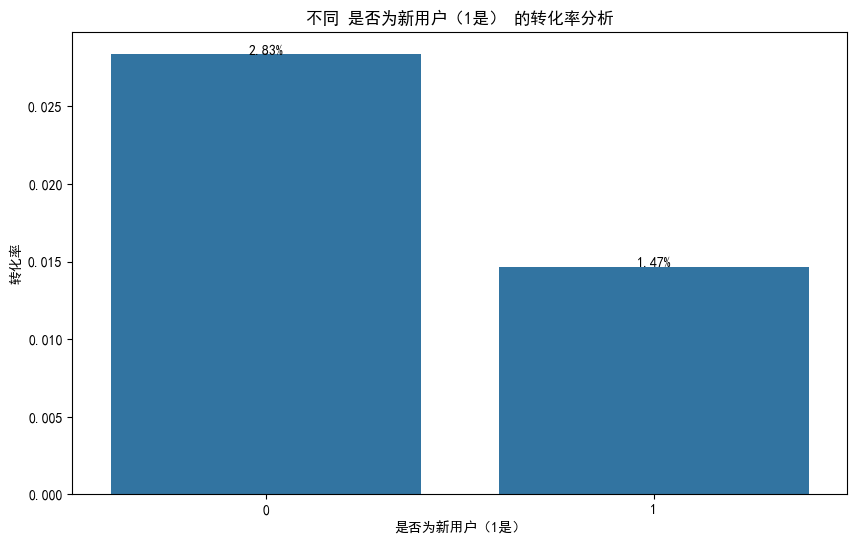

In [15]:
# 定义一个函数来计算并画出转化率
def plot_conversion_rate(df, col):
    # 计算每个类别的转化率 = 该类别支付完成人数 / 该类别总人数
    # sum() 是支付完成人数 (因为由0和1组成), count() 是总人数
    conversion_rates = df.groupby(col)['支付完成页'].agg(['mean', 'count']).reset_index()
    conversion_rates.columns = [col, '转化率', '人数']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='转化率', data=conversion_rates)
    plt.title(f'不同 {col} 的转化率分析')
    # 在柱子上显示具体数值
    for index, row in conversion_rates.iterrows():
        plt.text(index, row.转化率, f'{row.转化率:.2%}', color='black', ha="center")
    plt.show()

# 执行分析
plot_conversion_rate(data, '来源')    # 看看是 SEO, Ads 还是 Direct 转化好
plot_conversion_rate(data, '设备')    # 看看 Mobile 还是 Desktop 好
plot_conversion_rate(data, '年龄段')  # 看看哪个年龄段购买力强
plot_conversion_rate(data, '是否为新用户（1是）')

In [16]:
data.groupby('是否为新用户（1是）')['年龄'].count()

是否为新用户（1是）
0    68473
1    31525
Name: 年龄, dtype: int64

In [17]:
new_user=data[data['是否为新用户（1是）']==1]

In [18]:
new_user['来源'].value_counts()#seo搜索引擎优化的缩写

来源
Seo       18792
Ads       10435
Direct     2298
Name: count, dtype: int64

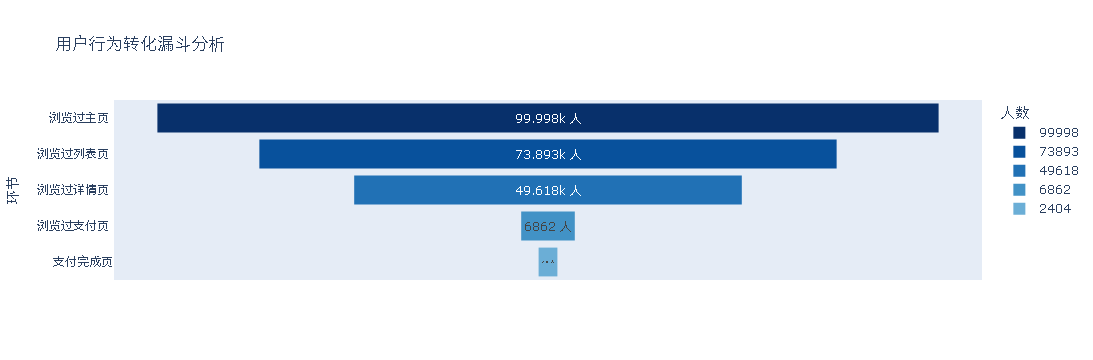

In [19]:
import plotly.express as px
funnel_stages = [
    '浏览过主页','浏览过列表页','浏览过详情页','浏览过支付页','支付完成页']

# 定义对应的中文标签，显示在图表上更直观
stage_labels = [
    '浏览过主页 ', 
    '浏览过列表页 ', 
    '浏览过详情页 ', 
    '浏览过支付页 ', 
    '支付完成页'
]

# 计算每个环节的总人数
# 逻辑：对每一列求和 (假设数据中 1 代表访问，0 代表未访问)
values = [data[col].sum() for col in funnel_stages]

# 组装成一个新的 DataFrame 用于绘图
funnel_df = pd.DataFrame({
    '环节': stage_labels,
    '人数': values
})

# 计算转化率（相对于上一环节的留存率）- 这一步是用来做显示的，Plotly有时会自动算，但自己算更可控
funnel_df['转化率'] = funnel_df['人数'].pct_change().fillna(0) + 1
# 第一步转化率设为 100%
funnel_df.loc[0, '转化率'] = 1.0 

# ==========================================
# 3. 绘制漏斗图
# ==========================================

fig = px.funnel(
    funnel_df, 
    x='人数', 
    y='环节',
    title='用户行为转化漏斗分析',
    # 设置颜色，数值越大颜色越深，或者直接指定颜色
    color='人数', 
    color_discrete_sequence=px.colors.sequential.Blues[::-1]
)

# 优化图表显示：在条形图上显示具体数值
fig.update_traces(texttemplate="%{value} 人", textposition="inside")


# 显示图表
fig.show()

## 用随机森林进行寻找那些因素影响转化率

为防止数据泄露，将浏览支付总数与浏览过支付页给去掉

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [21]:
feature=data.drop(['支付完成页','浏览过支付页'],axis=1)
label=data['支付完成页']

In [22]:
num_feature=[col for col in feature.columns if feature[col].dtype  in ['int','float']]
cat_feature=[col for col in feature.columns if feature[col].dtype=='object']

In [23]:
cat_feature

['性别', '设备', '系统', '来源']

In [24]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_feature),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat_feature)
    ]
)

In [25]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('model',RandomForestClassifier())])
pipeline.fit(feature,label)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
importances = pipeline.named_steps['model'].feature_importances_

# 直接从 preprocessor 获取所有处理后的特征名，避免 ValueError
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# 6. 组合并打印结果
feature_importance_map = dict(zip(feature_names, importances))

# 排序并打印
sorted_items = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)

print(f"{'特征名称':<20} {'重要性':<10}")
print("-" * 30)
for feature, importance in sorted_items:
    print(f"{feature:<20} {importance:.4f}")

特征名称                 重要性       
------------------------------
num__浏览页面总数          0.5007
num__年龄              0.2615
num__浏览过详情页          0.0669
num__市场级别            0.0628
num__是否为新用户（1是）      0.0208
cat__系统_android      0.0144
num__浏览过列表页          0.0103
cat__来源_Direct       0.0088
cat__来源_Seo          0.0079
cat__系统_iOS          0.0070
cat__性别_Male         0.0065
cat__性别_Female       0.0063
cat__系统_windows      0.0054
cat__来源_Ads          0.0051
cat__系统_mac          0.0042
cat__设备_desktop      0.0036
cat__设备_mobile       0.0036
cat__系统_other        0.0029
cat__系统_linux        0.0013
num__浏览过主页           0.0000
